In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import os
fp = r"C:\Users\13432\miniconda3\envs\a448\Library\lib\esmf.mk"
os.environ['ESMFMKFILE'] = fp
import xesmf as xe
import cartopy

Need to first define the data again, then regrid. So, we will import the esm5 data and we'll set the output grid of all other models to that of the Canadian model.

In [21]:
can_dset = xr.open_dataset('can_bc_dset.nc')
had_dset = xr.open_dataset('had_bc_dset.nc')
gis_dset = xr.open_dataset('gis_bc_dset.nc')
cru_dset = xr.open_dataset('cru_6010.nc')

In [3]:
ds_output = xr.Dataset(
    {
        'lat': (['lat'], can_dset.lat.to_numpy(), {'units': 'degrees_north'}),
        'lon': (['lon'], can_dset.lon.to_numpy(), {'units': 'degrees_east'}),
    }
)

ds_output

<xarray.Dataset> Size: 72B
Dimensions:  (lat: 3, lon: 6)
Coordinates:
  * lat      (lat) float64 24B 51.63 54.42 57.21
  * lon      (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Data variables:
    *empty*

## HadGEM 

Start by regridding the data here for this model

In [4]:
regridder = xe.Regridder(had_dset, ds_output, "conservative")
regridder  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_20x18_3x6.nc 
Reuse pre-computed weights? False 
Input grid shape:           (20, 18) 
Output grid shape:          (3, 6) 
Periodic in longitude?      False

In [7]:
had_out = regridder(had_dset.pr, keep_attrs=True)

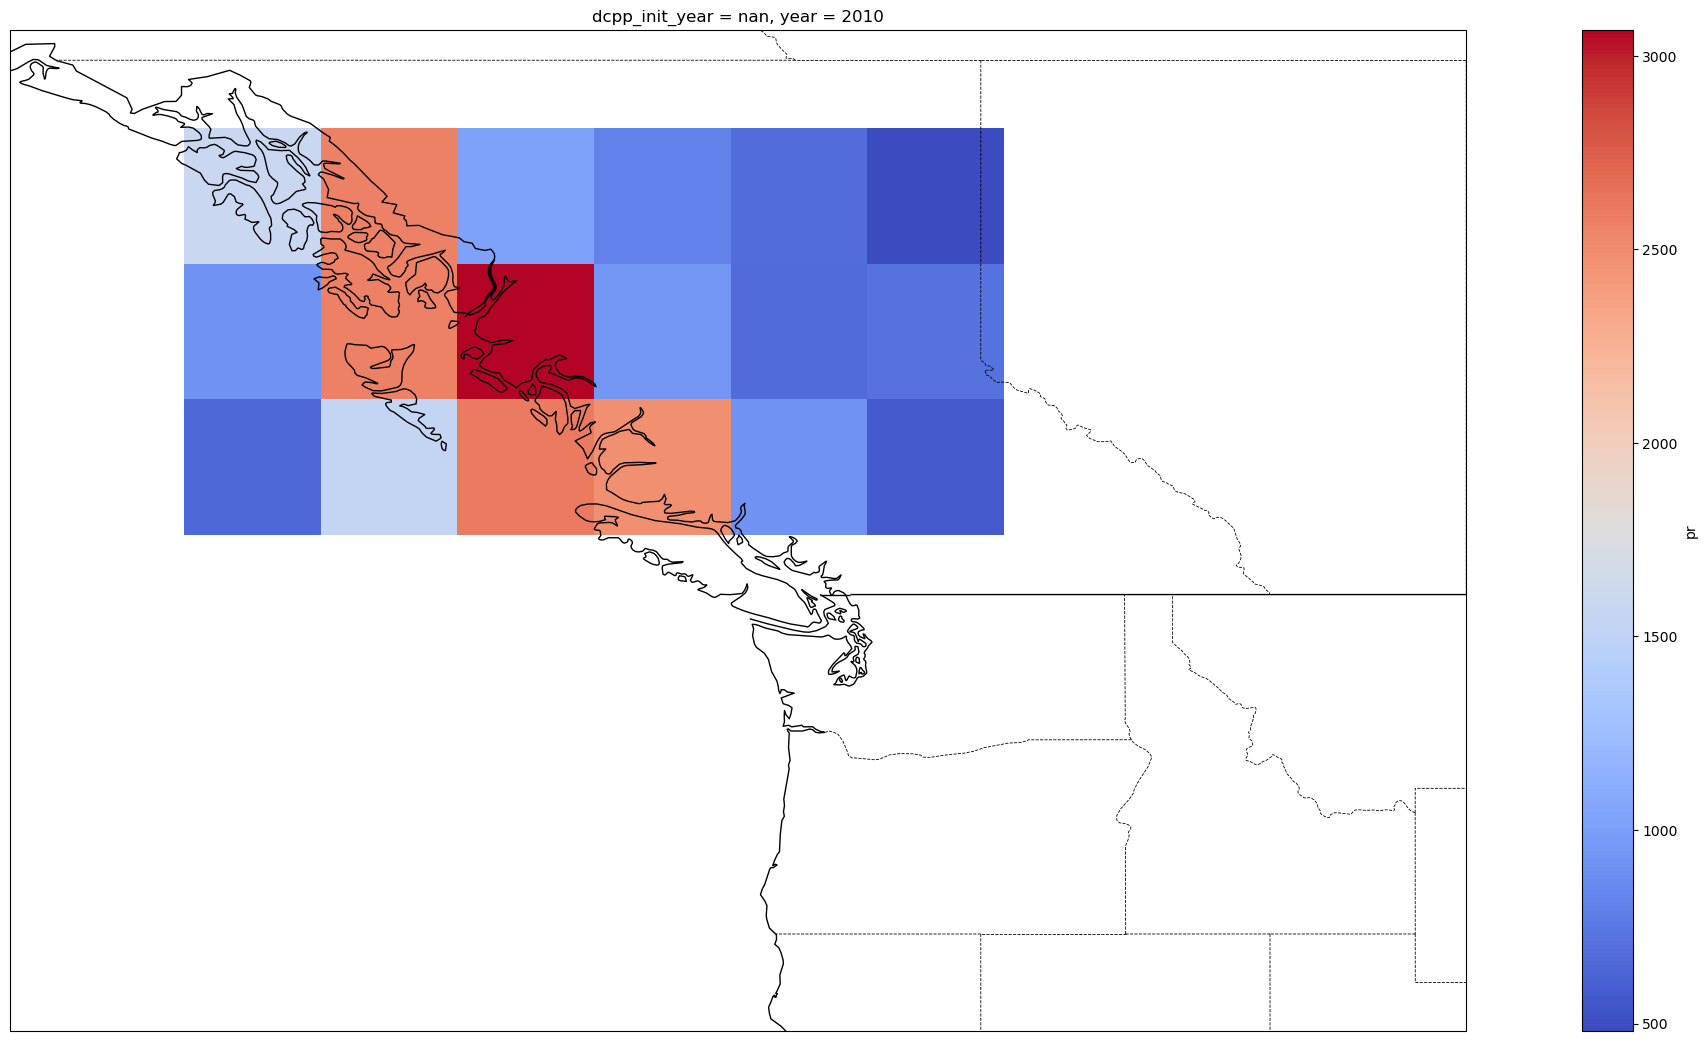

In [16]:
had_data2010 = had_out.sel(time='2010')
had_precip_data2010 = had_data2010.groupby('time.year').mean('time')*86400*365
had_precip_data2010 = had_precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax2 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax2.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax2.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



had_precip_data2010.plot(ax=ax2,cmap='coolwarm')
ax.title.set_text("Precipitation total for 2010")

## GISS 

Now regrid this data

In [17]:
regridder2 = xe.Regridder(gis_dset, ds_output, "conservative")
gis_out = regridder2(gis_dset.pr, keep_attrs=True)

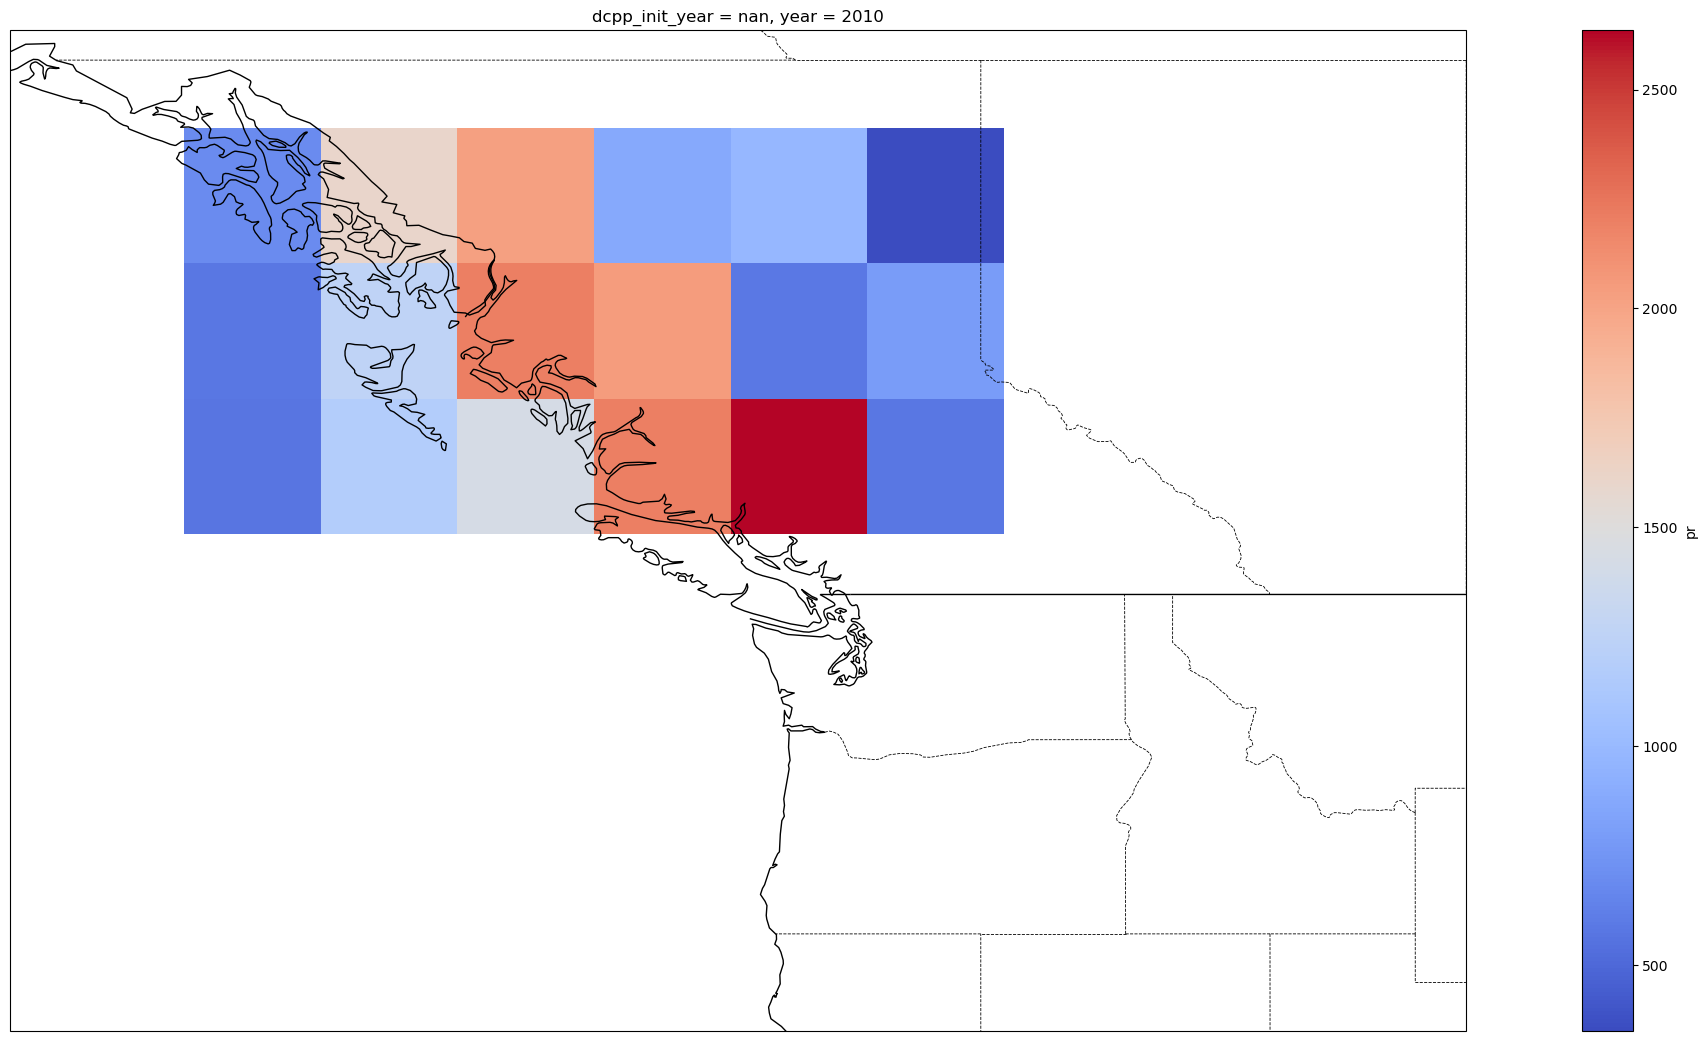

In [18]:
gis_data1990 = gis_out.sel(time='2010')
gis_precip_data1990 = gis_data1990.groupby('time.year').mean('time')*86400*365
gis_precip_data1990 = gis_precip_data1990.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



gis_precip_data1990.plot(ax=ax,cmap='coolwarm')

## CRU data

In [31]:
regridder3 = xe.Regridder(cru_dset, ds_output, "conservative")
cru_out = regridder3(cru_dset.pre, keep_attrs=True)
cru_out

<xarray.DataArray 'pre' (time: 612, lat: 3, lon: 6)> Size: 44kB
array([[[       nan,        nan,        nan, 168.0788  ,  68.673676,
          51.512123],
        [       nan,        nan,        nan,  60.62461 ,  40.622177,
          46.717056],
        [       nan, 117.169174,  65.68122 ,  35.405563,  33.44005 ,
          22.750607]],

       [[       nan,        nan,        nan, 171.97052 ,  59.142185,
          39.05044 ],
        [       nan,        nan,        nan,  59.407604,  45.67183 ,
          57.172848],
        [       nan,  79.22634 ,  41.644733,  29.880064,  38.45085 ,
          23.983072]],

       [[       nan,        nan,        nan, 181.03453 ,  48.7573  ,
          33.05301 ],
        [       nan,        nan,        nan,  79.74628 ,  51.623863,
          63.390865],
        [       nan, 105.22741 ,  52.701088,  33.746838,  59.07876 ,
          48.011353]],
...
       [[       nan,        nan,        nan, 267.43372 ,  63.243366,
          30.969927],
        [       nan,        nan,        nan, 100.84456 ,  45.69235 ,
          50.322426],
        [       nan, 227.45534 , 102.86039 ,  27.839808,  17.368582,
          12.525897]],

       [[       nan,        nan,        nan, 205.93471 ,  75.33713 ,
          57.295036],
        [       nan,        nan,        nan,  79.438774,  52.9336  ,
          59.779213],
        [       nan, 115.23817 ,  58.267418,  29.687584,  31.636818,
          22.641062]],

       [[       nan,        nan,        nan, 275.2431  , 100.4951  ,
          52.93428 ],
        [       nan,        nan,        nan,  79.19371 ,  60.60169 ,
          64.8017  ],
        [       nan,  88.137634,  54.63731 ,  47.896915,  67.885216,
          47.503803]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 5kB 1960-01-16 1960-02-15 ... 2010-12-16
  * lat      (lat) float64 24B 51.63 54.42 57.21
  * lon      (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0
    regrid_method:               conservative

Text(0.5, 1.0, 'CRU data re-gridded')

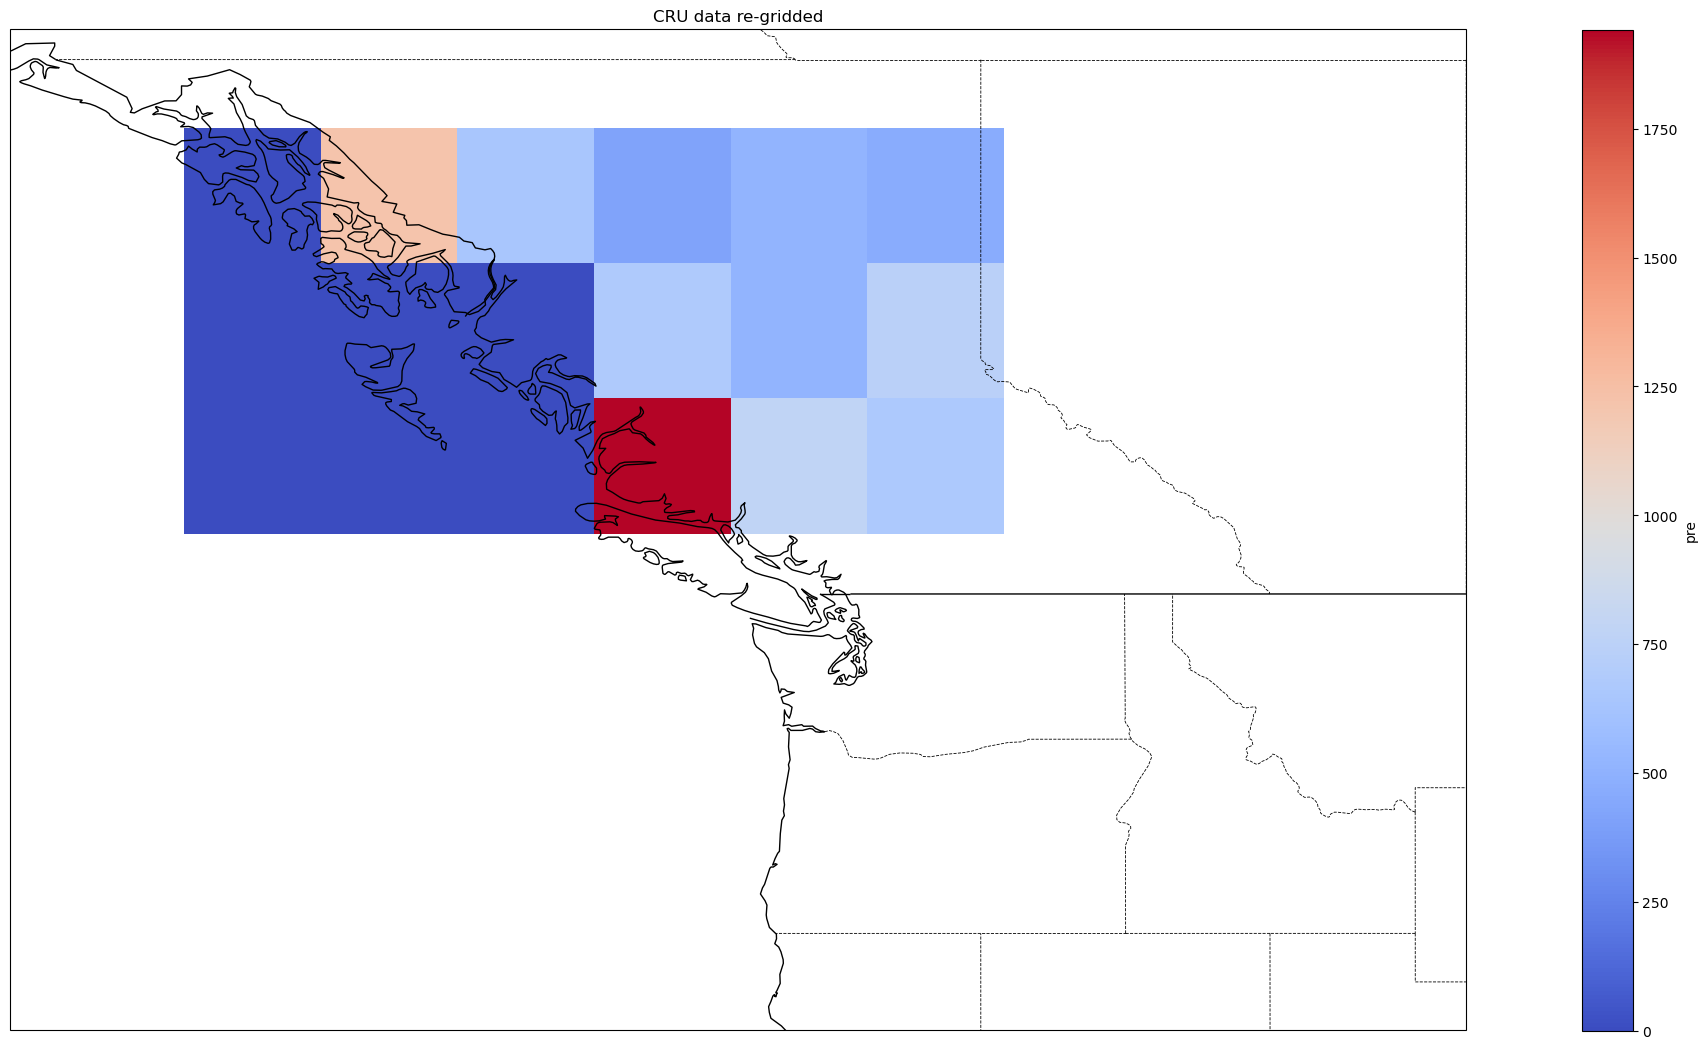

In [35]:
cru_2010 = cru_out.sel(time='2010')
cru_plot = cru_2010.sum('time')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



cru_plot.plot(ax=ax,cmap='coolwarm')
ax.set_title('CRU data re-gridded')

## Write these regridding datasets to file

In [30]:
write = False
if write:
    had_out.load().to_netcdf('had_regrid.nc')
    gis_out.load().to_netcdf('gis_regrid.nc')
    cru_out.load().to_netcdf('cru_regrid.nc')